# Exploring and Analyzing Text Data Assignment 

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [4]:
PATH = '/content/drive/MyDrive/cnn_articles/'

DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [5]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]
docs[0]

'Pink taking a break to focus on familyUpdated 10:18 AM ET, Thu November 14, 2019(CNN) - Pink has been working pretty hard and it sounds like she will be taking a step back in 2020.Speaking with "Entertainment Tonight" on the Country Music Association Awards red carpet, the singer was joined by her husband, Carey Hart, and their kids Willow, 8, and Jameson, 2.Pink was there to perform her song "Love Me Anyway" with country star Chris Stapleton, and she  talked about how hectic things have been. "We did two and a half years of [music] and Willow\'s back in school now, Jameson\'s going to start pre-school soon," Pink said. "It\'s kind of the year of the family."The star also praised her husband, with whom she will celebrate 14 years of marriage in January."Carey has a lot going on as well," she said of Hart, who went from being a professional motocross competitor to racing off-road trucks. "He\'s super supportive, he follows me around the world and now it\'s his turn."According to Billbo

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [6]:
#text stats function
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens 
             if not token.lower() in stopwords.words('english')
             if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [8]:
stats = []

for i, doc in enumerate(docs):
  doc_stats = text_stats(doc)
  doc_stats = [f'Article_{i}'] + doc_stats
  stats.append(doc_stats)

In [11]:
len(stats)

14

In [12]:
#make into dataframe
doc_df = pd.DataFrame(stats)
doc_df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']
doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,Article_0,7,241,128,95,12,18.285714,5.273438,0.742188
1,Article_1,15,685,380,269,31,25.333333,6.297368,0.707895
2,Article_2,13,555,281,181,11,21.615385,5.594306,0.644128
3,Article_3,29,1029,545,338,39,18.793103,5.825688,0.620183
4,Article_4,68,1999,1055,607,78,15.514706,6.376303,0.575355


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [13]:
#summarizing stats
doc_df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,30.500000,944.785714,513.785714,317.642857,34.714286,18.080184,5.970082,0.649588
std,21.302763,558.518532,310.149388,168.421453,23.407522,3.875462,0.500651,0.064843
min,7.000000,241.000000,128.000000,95.000000,10.000000,12.916667,5.172414,0.500477
25%,13.000000,551.250000,287.000000,186.750000,15.750000,15.245507,5.648240,0.621904
50%,29.000000,931.000000,501.500000,314.000000,29.500000,18.205357,5.934083,0.644738
75%,43.250000,1253.000000,670.750000,429.000000,38.250000,20.995690,6.356570,0.698134
max,68.000000,1999.000000,1055.000000,607.000000,80.000000,25.333333,6.873171,0.742188


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [16]:
#freq distribution bar chart for doc 7
doc = docs[7]

cleaned = [token.lower() for token in word_tokenize(doc) 
            if token.lower() not in stopwords.words('english') 
            if token.isalpha()]

fdist = FreqDist(cleaned)

#dataframe
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
#change column names
fdist_df.columns = ['Term', 'Freq']
fdist_df.head()

,Term,Freq
0,marine,2
1,deserter,2
2,wanted,3
3,murder,3
4,spotted,1


In [17]:
#sorting values by freq
ordered = fdist_df.sort_values('Freq', ascending=False)

#eliminate terms that only occur once
filtered = ordered[ordered['Freq'] > 1]
filtered.head()

,Term,Freq
29,brown,20
53,said,17
52,jones,10
17,police,10
5,roanoke,7


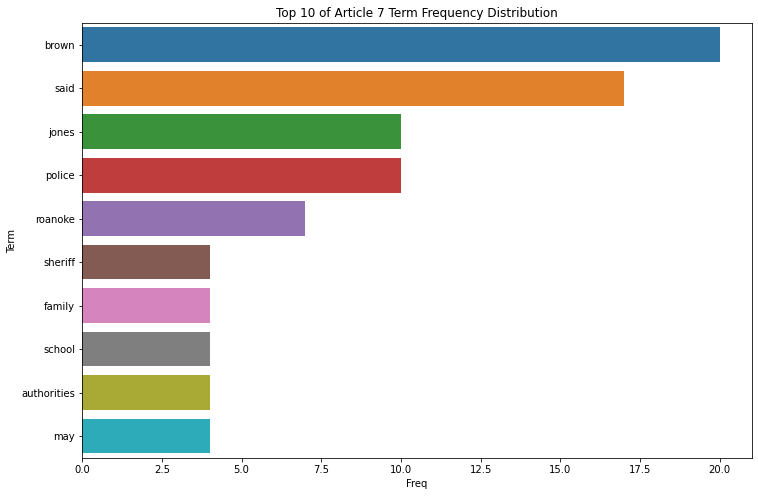

In [19]:
#bar chart
plt.figure(figsize=(12,8))
sns.barplot(data=filtered.head(10), x='Freq', y='Term')
plt.title('Top 10 of Article 7 Term Frequency Distribution')
plt.show()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [22]:
#word cloud viz
#function
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

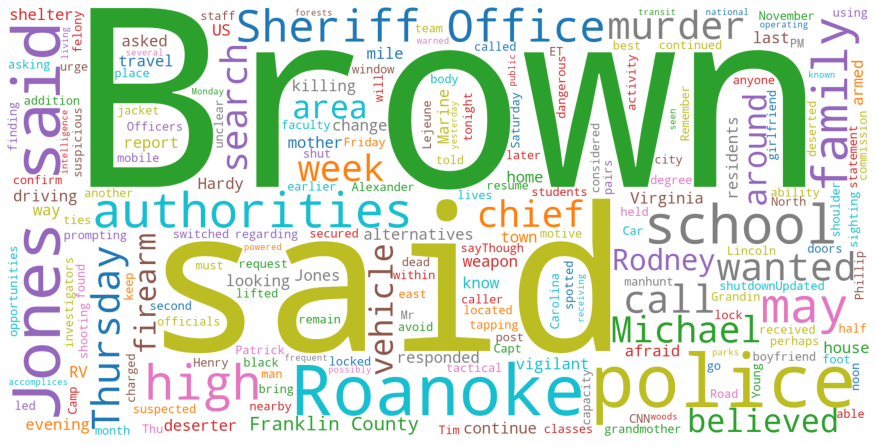

In [23]:
wordcloud(doc)

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

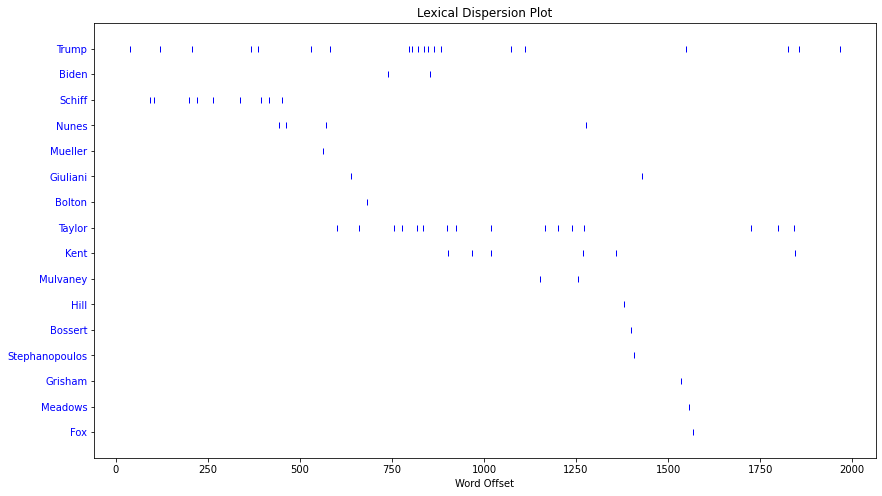

In [27]:
#Article 4
#dispersion plot
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

doc = docs[4]
tokenized = word_tokenize(doc)

#terms = ['Bloomberg', 'Biden', 'Patrick', 'Wolfson', 'Warren', 'Trump', 'Clinton', 'Buttigieg']
terms = ['Trump', 'Biden', 'Schiff', 'Nunes', 'Mueller', 'Giuliani', 'Bolton', 'Taylor', 'Kent', 
         'Mulvaney', 'Hill', 'Bossert', 'Stephanopoulos', 'Grisham', 'Meadows', 'Fox']

Text(tokenized).dispersion_plot(terms)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [28]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
#Article 10
doc = docs[10]

tokens = word_tokenize(doc)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color) for color, token in visualizer.tagged)))
print('\n')

Unlike Trump Ukraine scandal , no one died at WatergateUpdated 1:10 PM ET , Thu November 14 , 2019Editor 's Note : Paul Callan is a CNN legal analyst , a former New York homicide prosecutor and of counsel to the New York law firm of Edelman & Edelman PC , focusing on wrongful conviction and civil rights cases . Follow him on Twitter @ paulcallan . The opinions expressed in this commentary are his own . View more opinion on CNN . ( CNN ) - Prosecutors in serious criminal cases like to start strong and finish strong to bring home a guilty verdict . They have to grab the attention of the jury before defense attorneys sully the water . Former federal prosecutor and Harvard Law grad , House Intelligence Committee Chair Adam Schiff , successfully executed the first part of this strategy , making a compelling case against President Donald Trump in a carefully crafted and smoothly delivered opening statement . He successfully brushed aside an assortment of `` points of order '' and other parli